In [1]:
# libabries for data exploration.

import pandas as pd
import numpy as np

In [2]:
# load data.

mnist_784 = pd.read_csv("../../../Data/mnist/mnist_784.csv")
X, y = mnist_784.drop(['class', 'Unnamed: 0'], axis=1), mnist_784["class"]

In [4]:
# the labels are initially strings.
y = y.astype(np.uint8)

In [5]:
# this early split avoids data snooping.
# mnist is automatically split into train and test.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

param_grid = [
        {'n_neighbors': [4], 'weights': ['distance']}
        ]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [4], 'weights': ['distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [7]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [8]:
# does the same as the above function.

from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5826,    4,   17,    6,    1,   17,   40,    4,    5,    3],
       [   2, 6670,   18,    6,    8,    4,   17,   11,    4,    2],
       [  71,   66, 5534,   92,   33,    8,   50,   53,   36,   15],
       [  13,   29,   57, 5789,    4,   79,    7,   68,   52,   33],
       [   9,   75,   54,    9, 5416,   17,   23,   29,    9,  201],
       [  33,   17,   15,  168,   16, 4984,   88,   13,   39,   48],
       [  61,   16,   21,    3,   14,   48, 5747,    1,    7,    0],
       [  12,   64,   25,   18,   78,    2,    0, 5854,    3,  209],
       [  57,   88,   52,  121,   48,  217,   32,   21, 5140,   75],
       [  20,   15,   22,   54,  127,   13,    0,  214,   22, 5462]],
      dtype=int64)

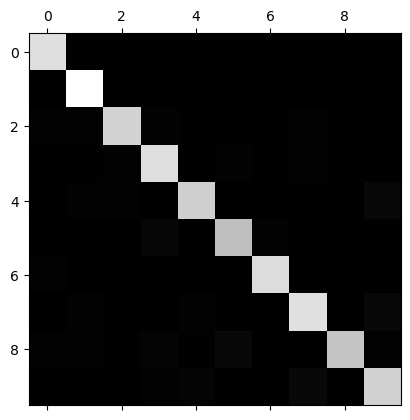

In [10]:
import matplotlib.pyplot as plt 

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [14]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[9.83623164e-01, 6.75333446e-04, 2.87016715e-03, 1.01300017e-03,
        1.68833361e-04, 2.87016715e-03, 6.75333446e-03, 6.75333446e-04,
        8.44166807e-04, 5.06500084e-04],
       [2.96647879e-04, 9.89320676e-01, 2.66983091e-03, 8.89943637e-04,
        1.18659152e-03, 5.93295758e-04, 2.52150697e-03, 1.63156333e-03,
        5.93295758e-04, 2.96647879e-04],
       [1.19167506e-02, 1.10775428e-02, 9.28835180e-01, 1.54414233e-02,
        5.53877140e-03, 1.34273246e-03, 8.39207788e-03, 8.89560255e-03,
        6.04229607e-03, 2.51762336e-03],
       [2.12037188e-03, 4.73006035e-03, 9.29701517e-03, 9.44217909e-01,
        6.52422117e-04, 1.28853368e-02, 1.14173870e-03, 1.10911760e-02,
        8.48148752e-03, 5.38248247e-03],
       [1.54056830e-03, 1.28380692e-02, 9.24340979e-03, 1.54056830e-03,
        9.27079767e-01, 2.90996234e-03, 3.93700787e-03, 4.96405341e-03,
        1.54056830e-03, 3.44060253e-02],
       [6.08743774e-03, 3.13595278e-03, 2.76701716e-03, 3.09905921e-02,
   

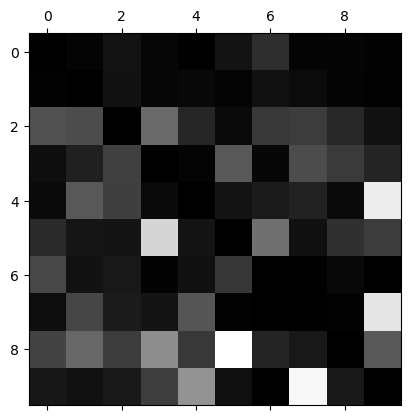

In [15]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()